In [98]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_excel(io='CU_V1.xlsx', sheet_name='Factors', parse_dates=True, index_col='Date').sort_index()

# Create the independent variables and the dependent variables
num_cols = len(df.columns)
X = df.iloc[:, :-1].values  # All but the last colum
y = df.iloc[:, num_cols-1].values    # The Last column

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling - Needs to be done for SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_train = sc_y.fit_transform(y_train)
y_test = np.array(y_test).reshape(-1,1)
y_test = sc_y.fit_transform(y_test)

# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

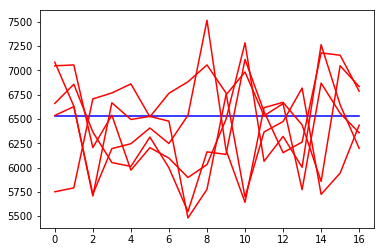

In [99]:
# Predict using the test Data

#vals = np.array([[6.5]])
y_pred = sc_y.inverse_transform(regressor.predict(sc_y.transform(X_test)))
y_test = sc_y.inverse_transform(X_test)
#y_train = sc_y.inverse_transform(X_train)

plt.plot(y_pred, color='b')
plt.plot(y_test, color='r')
#plt.plot(y_train, color='g')

plt.show()